In [ ]:
# Name : Syed Sabibr Ahmed
# ID: 2301659

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Answer to the Question no: 1

In [127]:
ecommerce = pd.read_csv('ecommerce_data.csv')
ecommerce.head()

,Customer ID,Age,Gender,Number of Transactions,Average Transaction Value,Customer Tenure (years)
0,1,56,Female,8,244.25,4
1,2,69,Male,6,200.85,3
2,3,46,Male,2,273.13,1
3,4,32,Male,4,148.27,1
4,5,60,Male,9,115.71,1


In [128]:
numeric_columns = ecommerce.select_dtypes(include='number')
column_averages = numeric_columns.mean()

ecommerce['Total Transaction Value'] = ecommerce['Number of Transactions'] * ecommerce['Average Transaction Value']

print("Average of Numeric Columns:")
print(column_averages)
print("\nDataFrame with New Column:")
print(ecommerce)

Average of Numeric Columns:
Customer ID                  500.5000
Age                           43.8190
Number of Transactions         4.3770
Average Transaction Value    247.3899
Customer Tenure (years)        2.5840
dtype: float64

DataFrame with New Column:
     Customer ID  Age  Gender  Number of Transactions  \
0              1   56  Female                       8   
1              2   69    Male                       6   
2              3   46    Male                       2   
3              4   32    Male                       4   
4              5   60    Male                       9   
..           ...  ...     ...                     ...   
995          996   60    Male                       8   
996          997   64  Female                       4   
997          998   62  Female                       7   
998          999   35  Female                       5   
999         1000   55    Male                       4   

     Average Transaction Value  Customer Tenure (years

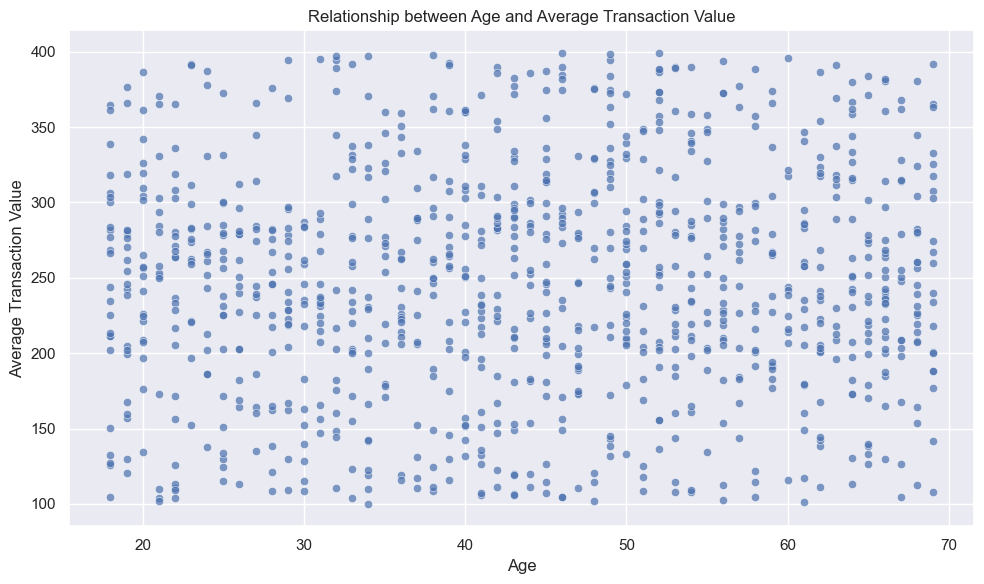

In [129]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ecommerce, x='Age', y='Average Transaction Value', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Average Transaction Value')
plt.title('Relationship between Age and Average Transaction Value')

plt.grid(True)
plt.tight_layout()
plt.show()

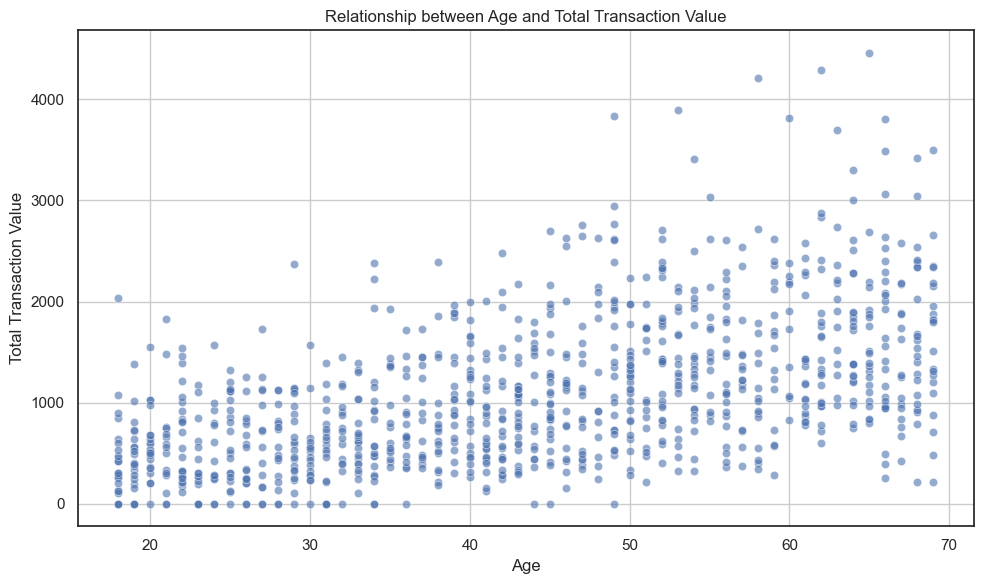

In [130]:
sns.set(style='white')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ecommerce, x='Age', y='Total Transaction Value', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Total Transaction Value')
plt.title('Relationship between Age and Total Transaction Value')

plt.grid(True)
plt.tight_layout()
plt.show()

In [131]:
gender_stats = ecommerce.groupby('Gender').agg({'Number of Transactions': 'sum', 'Average Transaction Value': 'mean'}).reset_index()
print(gender_stats)

   Gender  Number of Transactions  Average Transaction Value
0  Female                    2183                 295.898924
1    Male                    2194                 198.491245


In [132]:
from scipy.stats import ttest_ind
male_data = ecommerce[ecommerce['Gender'] == 'Male']['Average Transaction Value']
female_data = ecommerce[ecommerce['Gender'] == 'Female']['Average Transaction Value']

t_statistic, p_value = ttest_ind(male_data, female_data)

if p_value < 0.05:
    print("The difference in average transaction value between male and female customers is statistically significant.")
else:
    print("There is no statistically significant difference in average transaction value between male and female customers.")

The difference in average transaction value between male and female customers is statistically significant.


In [133]:
def loyalty_level(tenure):
    if tenure >= 4:
        return 'Loyal'
    elif tenure >= 3:
        return 'Established'
    elif tenure >= 1:
        return 'New'
    else:
        return 'Undefined'
ecommerce['Loyalty Level'] = ecommerce['Customer Tenure (years)'].apply(loyalty_level)
print(ecommerce.head())

   Customer ID  Age  Gender  Number of Transactions  \
0            1   56  Female                       8   
1            2   69    Male                       6   
2            3   46    Male                       2   
3            4   32    Male                       4   
4            5   60    Male                       9   

   Average Transaction Value  Customer Tenure (years)  \
0                     244.25                        4   
1                     200.85                        3   
2                     273.13                        1   
3                     148.27                        1   
4                     115.71                        1   

   Total Transaction Value Loyalty Level  
0                  1954.00         Loyal  
1                  1205.10   Established  
2                   546.26           New  
3                   593.08           New  
4                  1041.39           New  


In [134]:
average_total_transaction = ecommerce.groupby('Loyalty Level')['Total Transaction Value'].mean()
print(average_total_transaction)

Loyalty Level
Established    1041.569160
Loyal          1176.745077
New            1059.471755
Name: Total Transaction Value, dtype: float64


# Below is the answer to question no 2


In [135]:
health_clinic_data = pd.read_csv('health_no_show.csv')
health_clinic_data.head(100000)

,Patient ID,Age,Gender,Health Condition,Days Until Appointment,No-show
0,1,56,Male,NaN,11,Yes
1,2,69,Male,Diabetes,20,No
2,3,46,Female,NaN,24,No
3,4,32,Male,NaN,15,No
4,5,60,Male,NaN,48,Yes
...,...,...,...,...,...,...
995,996,18,Male,NaN,23,No
996,997,35,Female,Hypertension,14,No
997,998,49,Female,NaN,56,No
998,999,64,Male,NaN,55,Yes


In [136]:
health_clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient ID              1000 non-null   int64 
 1   Age                     1000 non-null   int64 
 2   Gender                  1000 non-null   object
 3   Health Condition        503 non-null    object
 4   Days Until Appointment  1000 non-null   int64 
 5   No-show                 1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [137]:
health_clinic_data = health_clinic_data.dropna()
print(health_clinic_data)

     Patient ID  Age  Gender Health Condition  Days Until Appointment No-show
1             2   69    Male         Diabetes                      20      No
5             6   25  Female     Hypertension                       7     Yes
6             7   78    Male         Diabetes                      21      No
9            10   75    Male         Diabetes                      44      No
10           11   36    Male         Diabetes                      56      No
..          ...  ...     ...              ...                     ...     ...
990         991   22  Female     Hypertension                      31      No
992         993   73    Male         Diabetes                      39      No
993         994   50    Male         Diabetes                       3      No
996         997   35  Female     Hypertension                      14      No
999        1000   66  Female         Diabetes                      27     Yes

[503 rows x 6 columns]


In [138]:
health_clinic_data

,Patient ID,Age,Gender,Health Condition,Days Until Appointment,No-show
1,2,69,Male,Diabetes,20,No
5,6,25,Female,Hypertension,7,Yes
6,7,78,Male,Diabetes,21,No
9,10,75,Male,Diabetes,44,No
10,11,36,Male,Diabetes,56,No
...,...,...,...,...,...,...
990,991,22,Female,Hypertension,31,No
992,993,73,Male,Diabetes,39,No
993,994,50,Male,Diabetes,3,No
996,997,35,Female,Hypertension,14,No


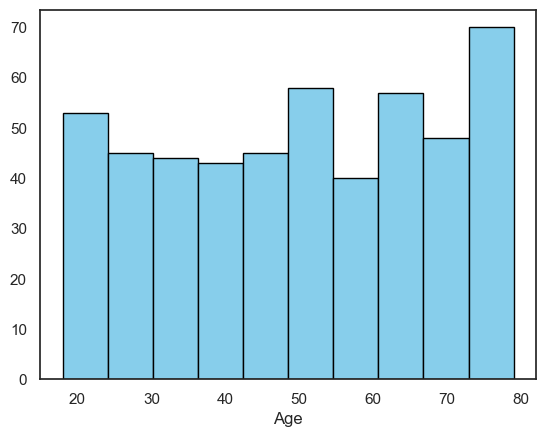

In [139]:
plt.hist(health_clinic_data['Age'], bins=10 , color='skyblue', edgecolor='black')

plt.xlabel('Age')
plt.show()

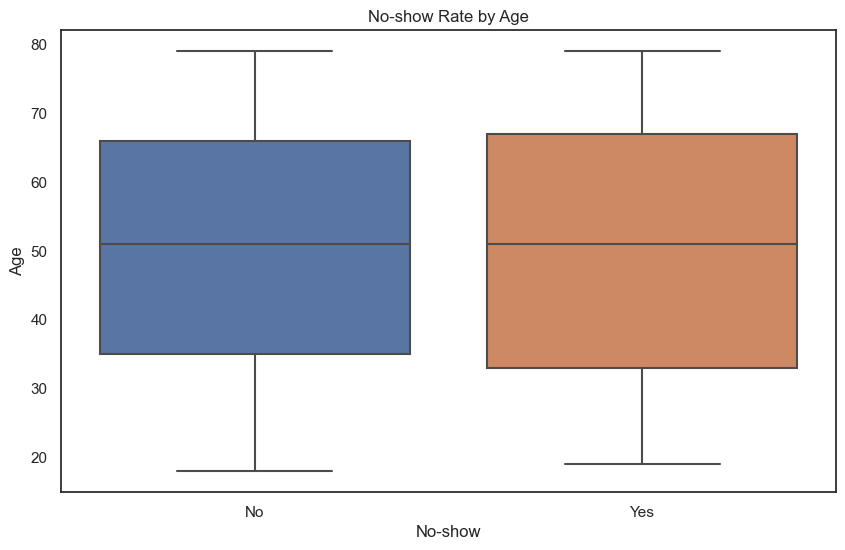

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'health_clinic_data' with columns 'Age' and 'No-show'

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='No-show', y='Age', data=health_clinic_data)
plt.title('No-show Rate by Age')
plt.xlabel('No-show')
plt.ylabel('Age')
plt.show()

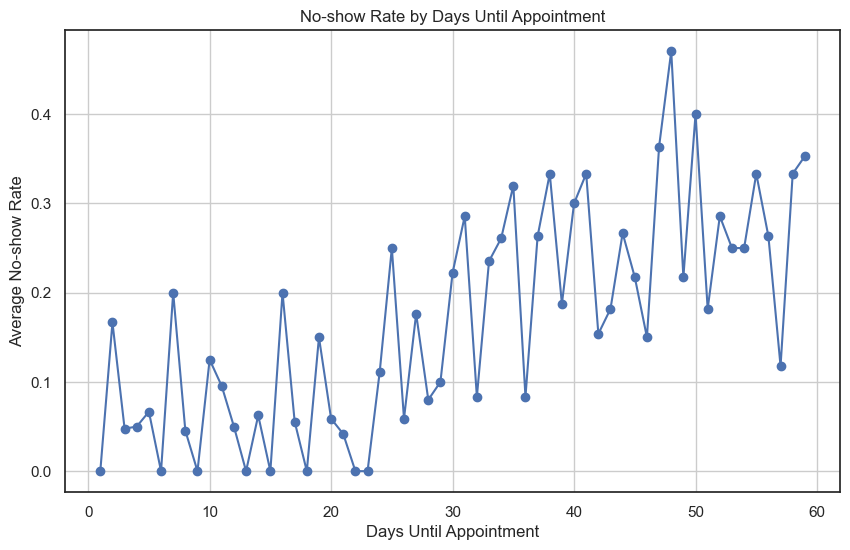

In [141]:
health_clinic_data = pd.DataFrame(data)

health_clinic_data['No-show'] = health_clinic_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

avg_no_show_rate = health_clinic_data.groupby('Days Until Appointment')['No-show'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_no_show_rate.index, avg_no_show_rate.values, marker='o', linestyle='-')

plt.xlabel('Days Until Appointment')
plt.ylabel('Average No-show Rate')
plt.title('No-show Rate by Days Until Appointment')

plt.grid(True)
plt.show()

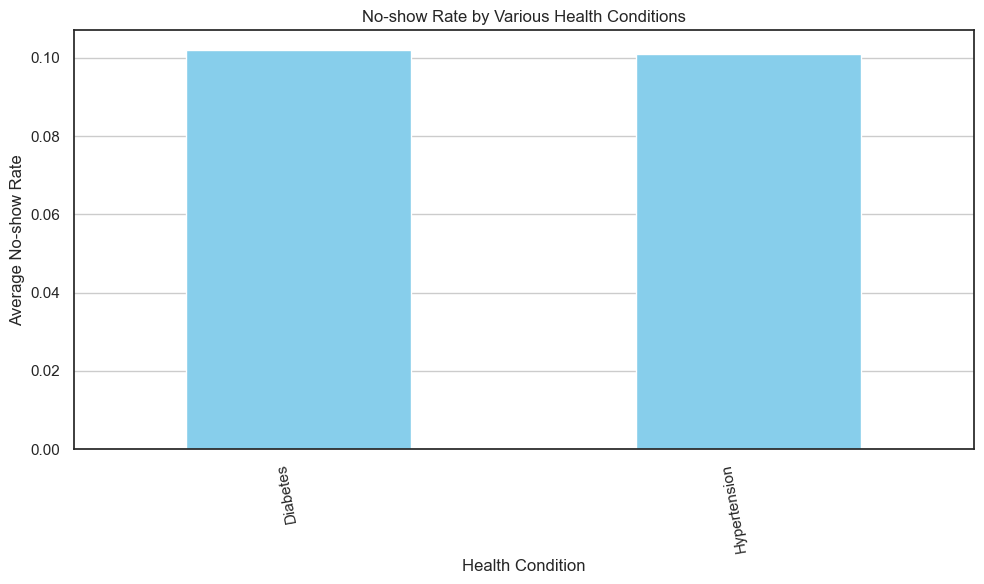

In [142]:
health_clinic_data = pd.DataFrame(data)

health_clinic_data['No-show'] = health_clinic_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

avg_no_show_rate_by_condition = health_clinic_data.groupby('Health Condition')['No-show'].mean()

plt.figure(figsize=(10, 6))
avg_no_show_rate_by_condition.plot(kind='bar', color='skyblue')

plt.xlabel('Health Condition')
plt.ylabel('Average No-show Rate')
plt.title('No-show Rate by Various Health Conditions')

plt.xticks(rotation=100, ha='right')  
plt.tight_layout()  
plt.grid(axis='y')  
plt.show()

In [143]:
age_stats = health_clinic_data['Age'].describe()

gender_counts = health_clinic_data['Gender'].value_counts()

health_condition_counts = health_clinic_data['Health Condition'].value_counts()

print("Descriptive Statistics for Age:")
print(age_stats)
print("\nValue Counts for Gender:")
print(gender_counts)
print("\nValue Counts for Health Condition:")
print(health_condition_counts)

Descriptive Statistics for Age:
count    1000.000000
mean       49.857000
std        18.114267
min        18.000000
25%        35.000000
50%        50.000000
75%        66.000000
max        79.000000
Name: Age, dtype: float64

Value Counts for Gender:
Gender
Male      523
Female    477
Name: count, dtype: int64

Value Counts for Health Condition:
Health Condition
Diabetes        265
Hypertension    238
Name: count, dtype: int64


In [144]:
total_appointments = len(health_clinic_data)

no_show_count = (health_clinic_data['No-show'] == 'Yes').sum()

overall_no_show_rate = no_show_count / total_appointments

print("Overall No-show Rate:", overall_no_show_rate)

Overall No-show Rate: 0.0


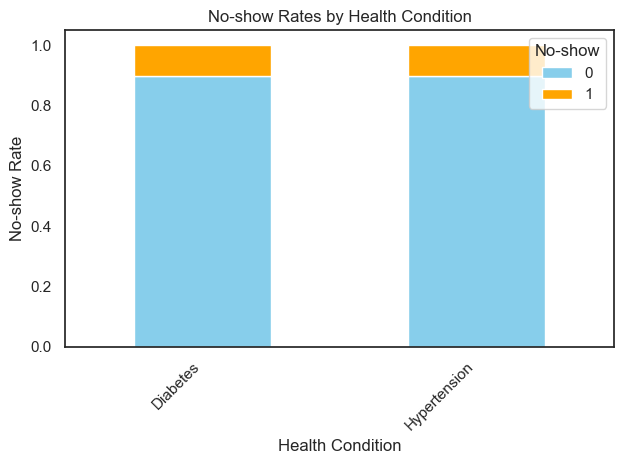

In [145]:
no_show_rates_by_condition = health_clinic_data.groupby('Health Condition')['No-show'].value_counts(normalize=True).unstack()
no_show_rates_by_condition.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('No-show Rates by Health Condition')
plt.xlabel('Health Condition')
plt.ylabel('No-show Rate')
plt.legend(title='No-show', loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [146]:
from scipy.stats import pearsonr, pointbiserialr

data = health_clinic_data.dropna(subset=['Age', 'Days Until Appointment', 'No-show'])

pearson_corr, _ = pearsonr(data['Age'], data['Days Until Appointment'])
print("Pearson Correlation Coefficient between Age and Days Until Appointment:", pearson_corr)

age_no_show_corr, _ = pointbiserialr(data['Age'], data['No-show'].map({'Yes': 1, 'No': 0}))
print("Point-Biserial Correlation between Age and No-show:", age_no_show_corr)

days_no_show_corr, _ = pointbiserialr(data['Days Until Appointment'], data['No-show'].map({'Yes': 1, 'No': 0}))
print("Point-Biserial Correlation between Days Until Appointment and No-show:", days_no_show_corr)

Pearson Correlation Coefficient between Age and Days Until Appointment: 0.04469553901100195


ValueError: array must not contain infs or NaNs

# Answer to the question no 3


In [197]:
city_livability_score = pd.read_csv('city_livability.csv')
city_livability_score. head(100)               

,City ID,Population,Public Facilities,Pollution Level,Crime Rate,Livability Score
0,City_1,171958,18.0,3.86,1.84,66.02
1,City_2,721155,NaN,NaN,4.31,27.99
2,City_3,181932,52.0,3.05,3.39,95.49
3,City_4,415838,19.0,4.84,3.20,73.79
4,City_5,309178,76.0,8.36,9.76,55.44
...,...,...,...,...,...,...
95,City_96,252283,34.0,7.72,2.56,32.87
96,City_97,246769,66.0,6.85,2.41,67.25
97,City_98,611353,79.0,8.64,3.25,75.24
98,City_99,273165,96.0,6.92,5.94,79.16


In [198]:
city_livability_score.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City ID            100 non-null    object 
 1   Population         100 non-null    int64  
 2   Public Facilities  90 non-null     float64
 3   Pollution Level    90 non-null     float64
 4   Crime Rate         100 non-null    float64
 5   Livability Score   100 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [199]:
threshold = city_livability_score['Livability Score'].quantile(0.95)

filtered_score = city_livability_score[city_livability_score['Livability Score'] <= threshold]
print(filtered_score)

     City ID  Population  Public Facilities  Pollution Level  Crime Rate  \
0     City_1      171958               18.0             3.86        1.84   
1     City_2      721155                NaN              NaN        4.31   
3     City_4      415838               19.0             4.84        3.20   
4     City_5      309178               76.0             8.36        9.76   
5     City_6      694167               82.0             8.75        4.54   
..       ...         ...                ...              ...         ...   
95   City_96      252283               34.0             7.72        2.56   
96   City_97      246769               66.0             6.85        2.41   
97   City_98      611353               79.0             8.64        3.25   
98   City_99      273165               96.0             6.92        5.94   
99  City_100      673587                NaN              NaN        7.43   

    Livability Score  
0              66.02  
1              27.99  
3              73.

In [201]:
 city_livability_score['Public_Facilities_mean'] = city_livability_score['Public Facilities'].fillna(city_livability_score['Public Facilities'].mean())

In [202]:
city_livability_score['Pollution_Level_mean'] = city_livability_score['Pollution Level'].fillna(city_livability_score['Pollution Level'].mean())

In [203]:
city_livability_score

,City ID,Population,Public Facilities,Pollution Level,Crime Rate,Livability Score,Public_Facilities_mean,Pollution_Level_mean
0,City_1,171958,18.0,3.86,1.84,66.02,18.000000,3.860000
1,City_2,721155,NaN,NaN,4.31,27.99,52.111111,5.512222
2,City_3,181932,52.0,3.05,3.39,95.49,52.000000,3.050000
3,City_4,415838,19.0,4.84,3.20,73.79,19.000000,4.840000
4,City_5,309178,76.0,8.36,9.76,55.44,76.000000,8.360000
...,...,...,...,...,...,...,...,...
95,City_96,252283,34.0,7.72,2.56,32.87,34.000000,7.720000
96,City_97,246769,66.0,6.85,2.41,67.25,66.000000,6.850000
97,City_98,611353,79.0,8.64,3.25,75.24,79.000000,8.640000
98,City_99,273165,96.0,6.92,5.94,79.16,96.000000,6.920000


In [206]:
city_livability_score['Public Facilities'] = city_livability_score['Public_Facilities_mean']
city_livability_score['Pollution Level'] = city_livability_score['Pollution_Level_mean']

In [207]:
city_livability_score

,City ID,Population,Public Facilities,Pollution Level,Crime Rate,Livability Score,Public_Facilities_mean,Pollution_Level_mean
0,City_1,171958,18.000000,3.860000,1.84,66.02,18.000000,3.860000
1,City_2,721155,52.111111,5.512222,4.31,27.99,52.111111,5.512222
2,City_3,181932,52.000000,3.050000,3.39,95.49,52.000000,3.050000
3,City_4,415838,19.000000,4.840000,3.20,73.79,19.000000,4.840000
4,City_5,309178,76.000000,8.360000,9.76,55.44,76.000000,8.360000
...,...,...,...,...,...,...,...,...
95,City_96,252283,34.000000,7.720000,2.56,32.87,34.000000,7.720000
96,City_97,246769,66.000000,6.850000,2.41,67.25,66.000000,6.850000
97,City_98,611353,79.000000,8.640000,3.25,75.24,79.000000,8.640000
98,City_99,273165,96.000000,6.920000,5.94,79.16,96.000000,6.920000


In [208]:
city_livability_score.drop(columns=['Public_Facilities_mean', 'Pollution_Level_mean'], inplace=True)

In [209]:
livability_score_mean = city_livability_score['Livability Score'].mean()

city_livability_score['Livability_Score_Above_Mean'] = city_livability_score['Livability Score'].apply(lambda x: 1 if x > livability_score_mean else 0)


In [210]:
city_livability_score


,City ID,Population,Public Facilities,Pollution Level,Crime Rate,Livability Score,Livability_Score_Above_Mean
0,City_1,171958,18.000000,3.860000,1.84,66.02,1
1,City_2,721155,52.111111,5.512222,4.31,27.99,0
2,City_3,181932,52.000000,3.050000,3.39,95.49,1
3,City_4,415838,19.000000,4.840000,3.20,73.79,1
4,City_5,309178,76.000000,8.360000,9.76,55.44,1
...,...,...,...,...,...,...,...
95,City_96,252283,34.000000,7.720000,2.56,32.87,0
96,City_97,246769,66.000000,6.850000,2.41,67.25,1
97,City_98,611353,79.000000,8.640000,3.25,75.24,1
98,City_99,273165,96.000000,6.920000,5.94,79.16,1


In [211]:
bins = [0, 200000, 400000, 600000, 800000, float('inf')]
labels = ['below 200000', '200000 - 400000', '400000 - 600000', '600000 - 800000', 'above 800000']

city_livability_score['Population_Category'] = pd.cut(city_livability_score['Population'], bins=bins, labels=labels)

print(city_livability_score.head())

  City ID  Population  Public Facilities  Pollution Level  Crime Rate  \
0  City_1      171958          18.000000         3.860000        1.84   
1  City_2      721155          52.111111         5.512222        4.31   
2  City_3      181932          52.000000         3.050000        3.39   
3  City_4      415838          19.000000         4.840000        3.20   
4  City_5      309178          76.000000         8.360000        9.76   

   Livability Score  Livability_Score_Above_Mean Population_Category  
0             66.02                            1        below 200000  
1             27.99                            0     600000 - 800000  
2             95.49                            1        below 200000  
3             73.79                            1     400000 - 600000  
4             55.44                            1     200000 - 400000  


In [212]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_columns = city_livability_score.select_dtypes(include=['int64', 'float64']).columns

city_livability_score[numeric_columns] = scaler.fit_transform(city_livability_score[numeric_columns])

print(city_livability_score.head())

  City ID  Population  Public Facilities  Pollution Level  Crime Rate  \
0  City_1    0.092320           0.139785         0.318594    0.079818   
1  City_2    0.719293           0.506571         0.505921    0.361460   
2  City_3    0.103707           0.505376         0.226757    0.256556   
3  City_4    0.370738           0.150538         0.429705    0.234892   
4  City_5    0.248973           0.763441         0.828798    0.982896   

   Livability Score  Livability_Score_Above_Mean Population_Category  
0          0.662856                          1.0        below 200000  
1          0.274676                          0.0     600000 - 800000  
2          0.963662                          1.0        below 200000  
3          0.742166                          1.0     400000 - 600000  
4          0.554864                          1.0     200000 - 400000  
